## Understanding the Data and Statistical Testing

In [1]:
import pandas as pd
import numpy as np

# data to test normality and visualize data
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt


from scipy import stats
from scipy.stats import pearsonr
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv('UTC_Census_Data_Merged.csv', sep=',')

In [3]:
UTC_df = pd.DataFrame(file)

In [4]:
UTC_df = UTC_df.set_index('census_bg')

In [5]:
UTC_df = UTC_df.drop(columns=['Unnamed: 0'])

In [6]:
UTC_df.head()

,Total Area in acres,Total Land Area in acres,Tree Canopy in acres,Tree Canopy area in percent,Vegetation in acres,Vegetation Percentage,Building area in acres,Building area in percent,Total Impervious Area in acres,Total Impervious Area in percent,...,Income in the past 12 months below poverty level,Median household income in the past 12 months,Total Population,Total Population of one race,Total White Population,Total African American Population,Total American Indian Population,Total Asian Population,Total Native Hawaiian Population,Total Population of Other Races
census_bg,,,,,,,,,,,,,,,,,,,,,
110010002011,133.35,133.34,39.42,29.563522,19.01,14.256787,29.47,22.101395,74.91,56.179691,...,0,94605,0,0,0,0,0,0,0,0
110010002021,47.44,47.44,15.31,32.272344,3.78,7.967960,12.79,26.960371,28.35,59.759696,...,0,250000,1179,1094,935,43,5,98,0,13
110010002022,33.48,33.48,11.52,34.408602,2.86,8.542413,8.84,26.403823,19.01,56.780167,...,0,217056,775,719,646,13,1,47,0,12
110010002023,38.17,38.17,9.17,24.024103,1.68,4.401362,13.59,35.603877,27.32,71.574535,...,0,185465,926,848,757,24,3,50,0,14
110010006001,53.10,53.10,36.48,68.700565,3.76,7.080979,5.67,10.677966,12.84,24.180791,...,0,109716,1134,1025,860,98,0,48,0,19


In [7]:
UTC_df.columns

Index(['Total Area in acres', 'Total Land Area in acres',
       'Tree Canopy in acres', 'Tree Canopy area in percent',
       'Vegetation in acres', 'Vegetation Percentage',
       'Building area in acres', 'Building area in percent',
       'Total Impervious Area in acres', 'Total Impervious Area in percent',
       'Road Acres', 'Road Area in percent', 'Sidewalk Area in acres',
       'Sidewalk Area in percent', 'Surface Water Area in acres',
       'Surface Water Area in percent', 'Soil area in acres',
       'Soil area in percent', 'Urban Tree Canopy area in acres',
       'Urban Tree Canopy area percent', 'Possible Planting Area in acres',
       'Possible Planting Area in percent',
       'Total Possible Planting Area in acres',
       'Total Possible Planting Area in percent',
       'Impervious Possible Planting Area in acres',
       'Impervious Possible Planting Area in percent',
       'Buildings and Roads Area in acres',
       'Buildings and Roads Area in percent',
      

In [14]:
UTC_df['White Population Percent'] = UTC_df['Total White Population']/UTC_df['Total Population']*100

In [15]:
UTC_df['White Population Percent'] = UTC_df['White Population Percent'].fillna(0)

In [16]:
UTC_df['White Population Percent'].head()

census_bg
110010002011     0.000000
110010002021    79.304495
110010002022    83.354839
110010002023    81.749460
110010006001    75.837743
Name: White Population Percent, dtype: float64

/Users/lensingh/.conda/envs/untitled/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Urban Tree Canopy area in acres'}>,
        <AxesSubplot:title={'center':'Possible Planting Area in acres'}>]],
      dtype=object)

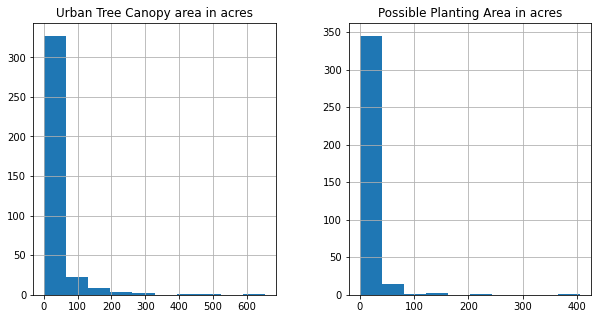

In [17]:
UTC_df[['Urban Tree Canopy area in acres', 'Possible Planting Area in acres']].hist(figsize=(10, 5))

array([[<AxesSubplot:title={'center':'Income in the past 12 months below poverty level'}>,
        <AxesSubplot:title={'center':'Median household income in the past 12 months'}>]],
      dtype=object)

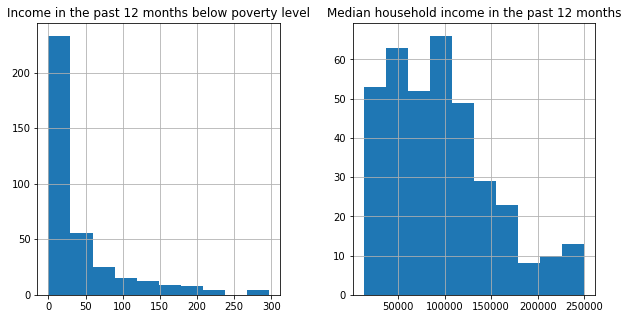

In [18]:
UTC_df[['Income in the past 12 months below poverty level', 'Median household income in the past 12 months']].hist(figsize=(10, 5))

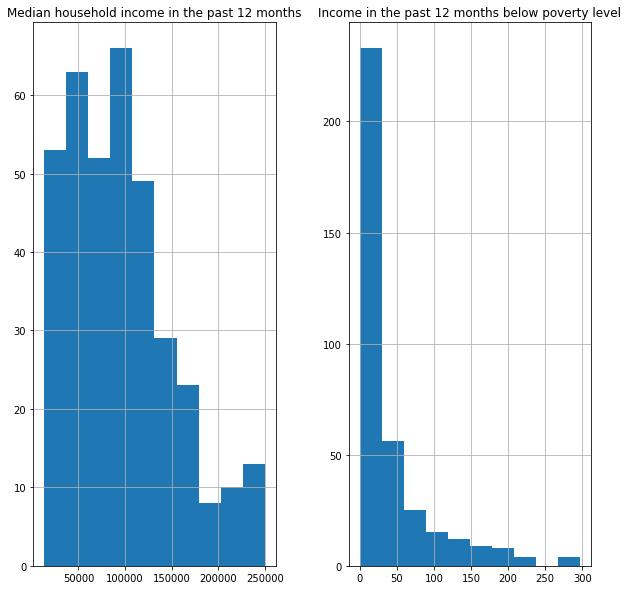

In [19]:
fig = UTC_df[['Median household income in the past 12 months', 'Income in the past 12 months below poverty level']].hist(figsize=(10, 10))

Is UTC canopy distributed fairly equally across all census block groups in dc?

array([[<AxesSubplot:title={'center':'Urban Tree Canopy area in acres'}>,
        <AxesSubplot:title={'center':'Urban Tree Canopy area percent'}>]],
      dtype=object)

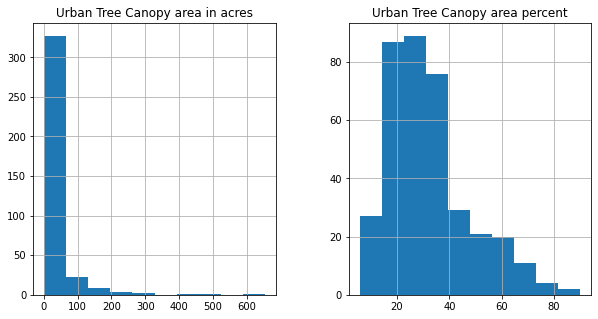

In [20]:
# not completely distributed
UTC_df[['Urban Tree Canopy area in acres', 'Urban Tree Canopy area percent']].hist(figsize=(10, 5))

In [21]:
print(UTC_df['Urban Tree Canopy area in acres'].std())
print(UTC_df['Urban Tree Canopy area percent'].std())

61.66255335745609
15.5465726374183


Pearsons correlation: 0.823


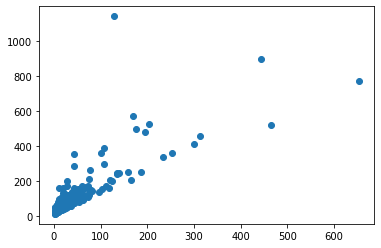

In [22]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area in acres'],  UTC_df['Total Land Area in acres'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area in acres'],  UTC_df['Total Land Area in acres'])

Pearsons correlation: -0.029


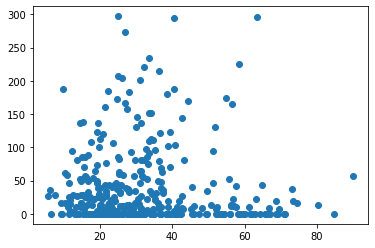

In [23]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Income in the past 12 months below poverty level'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Income in the past 12 months below poverty level'])

Pearsons correlation: 0.260


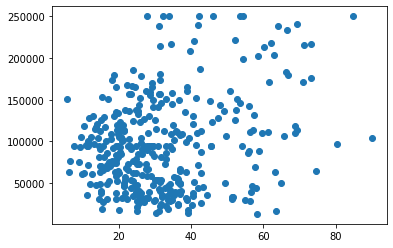

In [24]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Median household income in the past 12 months'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Median household income in the past 12 months'])
# slight positive correlation

Pearsons correlation: -0.007


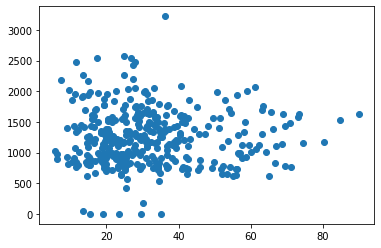

In [25]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Population'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Population'])

Pearsons correlation: 0.123


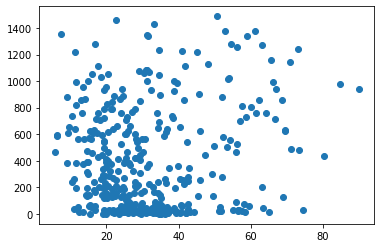

In [26]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total White Population'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total White Population'])

Pearsons correlation: -0.053


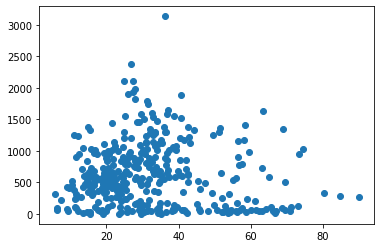

In [27]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total African American Population'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total African American Population'])

Pearsons correlation: -0.184


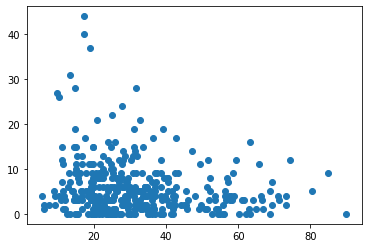

In [28]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total American Indian Population'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total American Indian Population'])

Pearsons correlation: -0.040


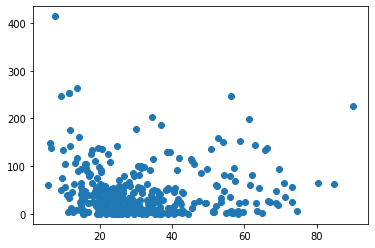

In [29]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Asian Population'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Asian Population'])

Pearsons correlation: -0.156


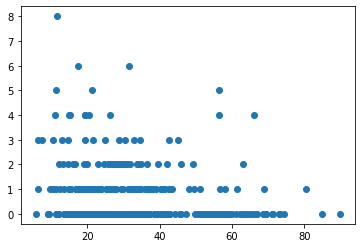

In [30]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Native Hawaiian Population'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Native Hawaiian Population'])

Pearsons correlation: -0.867


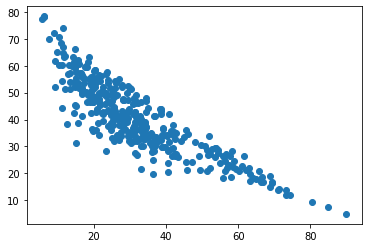

In [31]:
corr, _ = pearsonr(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Unsuitable Planting Area in percent'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(UTC_df['Urban Tree Canopy area percent'],  UTC_df['Total Unsuitable Planting Area in percent'])

# 'Possible Planting Area in percent',
#        'Total Unsuitable Planting Area in acres',
#        'Total Unsuitable Planting Area in percent'

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
y = UTC_df['Urban Tree Canopy area percent']

In [43]:
x = UTC_df.filter(items=['Total White Population','Median household income in the past 12 months','Total Native Hawaiian Population'])

In [44]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [45]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [46]:
y_prediction =  LR.predict(x_test)
y_prediction

array([34.61977968, 31.30712757, 38.0862514 , 29.57487823, 33.97050959,
       38.43282957, 40.40332039, 33.83832219, 32.53583727, 32.81050952,
       25.27114323, 42.64168574, 30.61888051, 29.87761049, 29.72325519,
       33.05382597, 33.04369945, 33.83933636, 34.01523685, 26.61163755,
       38.68859417, 21.96721978, 30.64613742, 28.8116365 , 26.6074089 ,
       30.45829736, 29.71291077, 28.82305325, 27.068267  , 29.22860789,
       28.8787573 , 36.05004454, 40.80155593, 29.34937729, 27.02929126,
       31.31423742, 26.18265363, 35.83212589, 29.78950118, 37.01303814,
       31.2624615 , 29.05240648, 30.48462727, 29.84933075, 30.85816652,
       33.04562831, 31.23896668, 36.97011695, 34.46121021, 33.16039552,
       22.44278808, 31.27012363, 29.56636433, 36.46196399, 31.73360602,
       34.91649494, 32.61275795, 38.74411669, 22.16929427, 33.98910353,
       28.51042863, 32.79816151, 34.72389072, 36.54822151, 26.79577267,
       41.56832863, 29.57833168, 25.18650589, 30.45840524, 41.62

In [47]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.1870684663540757
mean_sqrd_error is== 205.03595242198907
root_mean_squared error of is== 14.319076521270116


In [53]:
import statsmodels.api as sm

In [56]:
# References used for running multiple linear regression
# https://datatofish.com/multiple-linear-regression-python/
# https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

In [55]:
# with statsmodels
X = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                  
Dep. Variable:     Urban Tree Canopy area percent   R-squared:                       0.095
Model:                                        OLS   Adj. R-squared:                  0.087
Method:                             Least Squares   F-statistic:                     12.63
Date:                            Tue, 23 Nov 2021   Prob (F-statistic):           7.22e-08
Time:                                    20:37:39   Log-Likelihood:                -1504.9
No. Observations:                             366   AIC:                             3018.
Df Residuals:                                 362   BIC:                             3033.
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                                                    coef    std err          t      P>|t| 

In [26]:
import geopandas

In [27]:
df = geopandas.read_file('data/cb_2018_11_bg_500k/cb_2018_11_bg_500k.shp')

In [28]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,11,001,001500,3,1500000US110010015003,110010015003,3,BG,284806,200,"POLYGON ((-77.06419 38.97284, -77.05322 38.972..."
1,11,001,001402,1,1500000US110010014021,110010014021,1,BG,337376,0,"POLYGON ((-77.06205 38.96581, -77.05913 38.965..."
2,11,001,003301,1,1500000US110010033011,110010033011,1,BG,255035,0,"POLYGON ((-77.01215 38.92131, -77.01214 38.926..."
3,11,001,004100,2,1500000US110010041002,110010041002,2,BG,289805,6192,"POLYGON ((-77.05532 38.91904, -77.05458 38.919..."
4,11,001,001702,1,1500000US110010017021,110010017021,1,BG,419232,0,"POLYGON ((-77.02286 38.97351, -77.02277 38.973..."


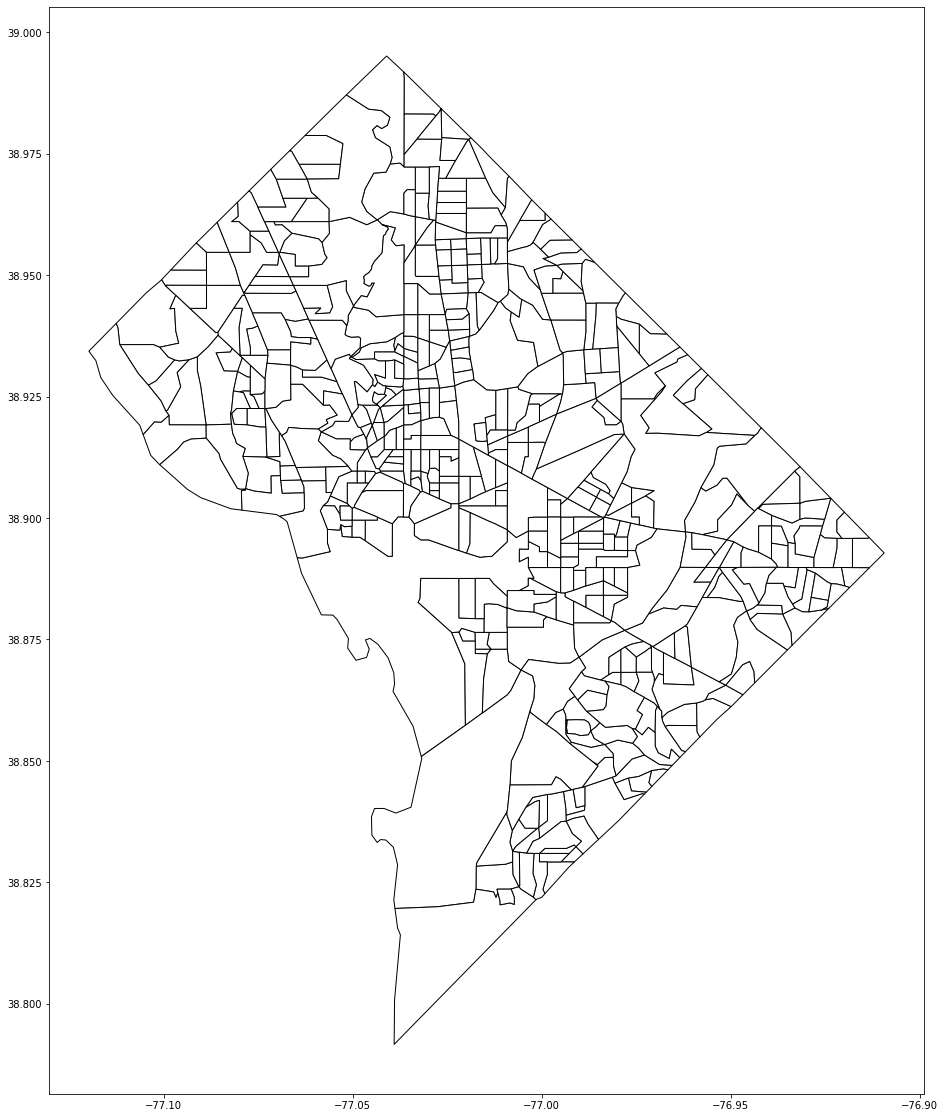

In [29]:
base = df.plot(color='white', edgecolor='black', figsize=(20,20))

In [38]:
# create a geo dataframe for the points of the flickr data
UTC_df = UTC_df.reset_index()

In [41]:
UTC_df = UTC_df.rename(columns={'census_bg':'GEOID'})

In [44]:
gdf_UTC = geopandas.GeoDataFrame(UTC_df)

In [47]:
gdf_UTC.head()

,GEOID,Total Area in acres,Total Land Area in acres,Tree Canopy in acres,Tree Canopy area in percent,Urban Tree Canopy area in acres,Urban Tree Canopy area percent,Possible Planting Area in acres,Possible Planting Area in percent,Total Unsuitable Planting Area in acres,...,Total Population,Total Population of one race,Total White Population,Total African American Population,Total American Indian Population,Total Asian Population,Total Native Hawaiian Population,Total Population of Other Races,White Population Percent,geometry
0,110010002011,133.35,133.34,39.42,29.563522,39.42,29.563522,15.25,11.436928,57.77,...,0,0,0,0,0,0,0,0,0.000000,POINT (5807664.721 10661.939)
1,110010002021,47.44,47.44,15.31,32.272344,15.31,32.272344,3.71,7.820405,21.95,...,1179,1094,935,43,5,98,0,13,79.304495,POINT (2066792.965 8808.711)
2,110010002022,33.48,33.48,11.52,34.408602,11.52,34.408602,2.75,8.213859,14.36,...,775,719,646,13,1,47,0,12,83.354839,POINT (1458942.506 4940.846)
3,110010002023,38.17,38.17,9.17,24.024103,9.17,24.024103,1.67,4.375164,20.82,...,926,848,757,24,3,50,0,14,81.749460,POINT (1662652.056 5300.317)
4,110010006001,53.10,53.10,36.48,68.700565,36.48,68.700565,3.74,7.043315,10.20,...,1134,1025,860,98,0,48,0,19,75.837743,POINT (2312922.382 6943.868)


In [50]:
# ensure the type matches with the tree data (int64)
df['GEOID']= df['GEOID'].apply(pd.to_numeric)

In [51]:
joined_tables = df.merge(gdf_UTC, how='left', on='GEOID')
joined_tables.head()



,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,Total Population,Total Population of one race,Total White Population,Total African American Population,Total American Indian Population,Total Asian Population,Total Native Hawaiian Population,Total Population of Other Races,White Population Percent,geometry_y
0,11,001,001500,3,1500000US110010015003,110010015003,3,BG,284806,200,...,1002.0,908.0,805.0,67.0,0.0,26.0,0.0,10.0,80.339321,POINT (3067477.646 7888.514)
1,11,001,001402,1,1500000US110010014021,110010014021,1,BG,337376,0,...,1016.0,901.0,756.0,77.0,3.0,55.0,0.0,10.0,74.409449,POINT (3631125.443 7945.737)
2,11,001,003301,1,1500000US110010033011,110010033011,1,BG,255035,0,...,1265.0,1156.0,570.0,490.0,11.0,50.0,0.0,35.0,45.059289,POINT (2687890.349 7865.434)
3,11,001,004100,2,1500000US110010041002,110010041002,2,BG,289805,6192,...,727.0,658.0,523.0,27.0,0.0,80.0,0.0,28.0,71.939477,POINT (3269312.401 9135.702)
4,11,001,001702,1,1500000US110010017021,110010017021,1,BG,419232,0,...,1599.0,1448.0,654.0,622.0,8.0,45.0,1.0,118.0,40.900563,POINT (4527934.621 9712.435)


In [56]:
joined_tables.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'AFFGEOID', 'GEOID',
       'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry_x', 'Total Area in acres',
       'Total Land Area in acres', 'Tree Canopy in acres',
       'Tree Canopy area in percent', 'Urban Tree Canopy area in acres',
       'Urban Tree Canopy area percent', 'Possible Planting Area in acres',
       'Possible Planting Area in percent',
       'Total Unsuitable Planting Area in acres',
       'Total Unsuitable Planting Area in percent', 'SHAPEAREA', 'SHAPELEN',
       'Geographic Area Name',
       'Income in the past 12 months below poverty level',
       'Median household income in the past 12 months', 'Total Population',
       'Total Population of one race', 'Total White Population',
       'Total African American Population', 'Total American Indian Population',
       'Total Asian Population', 'Total Native Hawaiian Population',
       'Total Population of Other Races', 'White Population Percent',
       'geometry_y

In [ ]:
# plt.scatter(combined_utc_census_df['Urban Tree Canopy area in acres'],  combined_utc_census_df['Total Land Area in acres'])
# corr, _ = pearsonr(combined_utc_census_df['Urban Tree Canopy area in percent'],  combined_utc_census_df['Total Land Area in acres'])
# print('Pearsons correlation: %.3f' % corr)
# combined_utc_census_df['Total Land Area in acres'].plot(figsize=(18,5))
# pyplot.boxplot(combined_utc_census_df['Urban Tree Canopy area in acres'])
# pyplot.show()

In [ ]:
# make computational rows

# urban tree canopy percentage quartile| total possible planting percentage/100 | total possible veg planting percentage | income in quartiles

                    .4                           .27                                            .15                                     .1
    
    